In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240712%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240712T105005Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9c1ff045d7156ac176af2a213268db913b7f986582c2d3245412ac84c4284b7bdf38b569eacfdfc8f0ae4f2b262b5e19b2521bff7c815f65e25a1f1a313b32e86aea451290739cad14283dea0cdad6cf6cc5cfca2a095c0122aa5cbb2b5d35e7a1f4b7aa08ff1b004cd08409ed8a5bf87509cf5150d9b33360f8345990f43c04ea7bd2c94403439629093f53cdd0b9b96a0d1236a558d3320dd385d2bb94c6c224129b512ade82c45223437b84b8b83618b6487264ac8c39246df9215c9b44b05c70b2df7b9a0b76756f832f22fd6e92ff07a3e5b9b5dbec01b60ebe36c3f11eb2e743a6f8447f61f867765ddbf12b61b5676aa4681b56034e90808167a0ce8d'

GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/kaggle'
KAGGLE_INPUT_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'input')
KAGGLE_WORKING_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'working')

from google.colab import drive
drive.mount('/content/drive')

shutil.rmtree(KAGGLE_INPUT_PATH, ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
                with ZipFile(tfile) as zfile:
                    zfile.extractall(destination_path)
            else:
                with tarfile.open(tfile.name) as tarfile:
                    tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [ ]:
pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


# **Importing Dependencies**

In [ ]:
import os
import cv2
import glob
import keras
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.utils import resample
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, precision_score, recall_score
from keras.layers import Conv2D,Dense,Dropout,GlobalAveragePooling2D,MaxPool2D
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import logging
# Set TensorFlow log level to only display errors
tf.get_logger().setLevel(logging.ERROR)

# **Loading Data**

In [ ]:
import glob
import pandas as pd
from sklearn.utils import resample
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the data directory
data_dir = '/content/drive/MyDrive/kaggle/input/chest-xray-pneumonia/chest_xray'
paths = glob.glob(data_dir + '/*/*/*.jpeg')

print(f'Found {len(paths)} images in the dataset')

# Create a DataFrame with image paths and labels
df = pd.DataFrame(paths, columns=['path'])
df['label'] = df['path'].apply(lambda x: x.split('/')[-2].strip())
df.head()

# Check the value counts for each label
counts = df['label'].value_counts()
print(counts)

# Separate majority and minority classes
df_majority = df[df.label == 'PNEUMONIA']
df_minority = df[df.label == 'NORMAL']

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine minority class with downsampled majority class
df = pd.concat([df_minority, df_majority_downsampled])

# Check the value counts for each label after downsampling
counts = df['label'].value_counts()
print(counts)


Mounted at /content/drive
Found 5856 images in the dataset
label
PNEUMONIA    4273
NORMAL       1583
Name: count, dtype: int64
label
NORMAL       1583
PNEUMONIA    1583
Name: count, dtype: int64


# **Lable Encoding**
**1:PNEUMONIA**  **0:OTHERWISE**

In [ ]:
df['label'] = df['label'].apply(lambda x: '1' if x == 'PNEUMONIA' else '0')
df.head()

,path,label
0,/content/drive/MyDrive/kaggle/input/chest-xray...,0
1,/content/drive/MyDrive/kaggle/input/chest-xray...,0
2,/content/drive/MyDrive/kaggle/input/chest-xray...,0
3,/content/drive/MyDrive/kaggle/input/chest-xray...,0
4,/content/drive/MyDrive/kaggle/input/chest-xray...,0


# **DATA SHUFFLING**

In [ ]:
df=df.sample(frac=1.0, random_state=42)
df.head(5)

,path,label
954,/content/drive/MyDrive/kaggle/input/chest-xray...,0
1720,/content/drive/MyDrive/kaggle/input/chest-xray...,0
170,/content/drive/MyDrive/kaggle/input/chest-xray...,0
2434,/content/drive/MyDrive/kaggle/input/chest-xray...,1
343,/content/drive/MyDrive/kaggle/input/chest-xray...,1


In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, valid_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print("Training set shapes:", train_df.shape)
print("Validation set shapes:", valid_df.shape)
print("Testing set shapes:", test_df.shape)

Training set shapes: (2532, 2)
Validation set shapes: (317, 2)
Testing set shapes: (317, 2)


In [ ]:
train_df['label'].value_counts()

label
1    1277
0    1255
Name: count, dtype: int64

In [ ]:
test_df['label'].value_counts()

label
0    166
1    151
Name: count, dtype: int64

In [ ]:
# Define data generator with augmentation options

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    rescale=1./255
)



test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)


valid_generator = test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)



test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

Found 2532 validated image filenames belonging to 2 classes.
Found 317 validated image filenames belonging to 2 classes.
Found 317 validated image filenames belonging to 2 classes.


In [ ]:
classes=['NORMAL','PNEUMONIA']
classes

['NORMAL', 'PNEUMONIA']

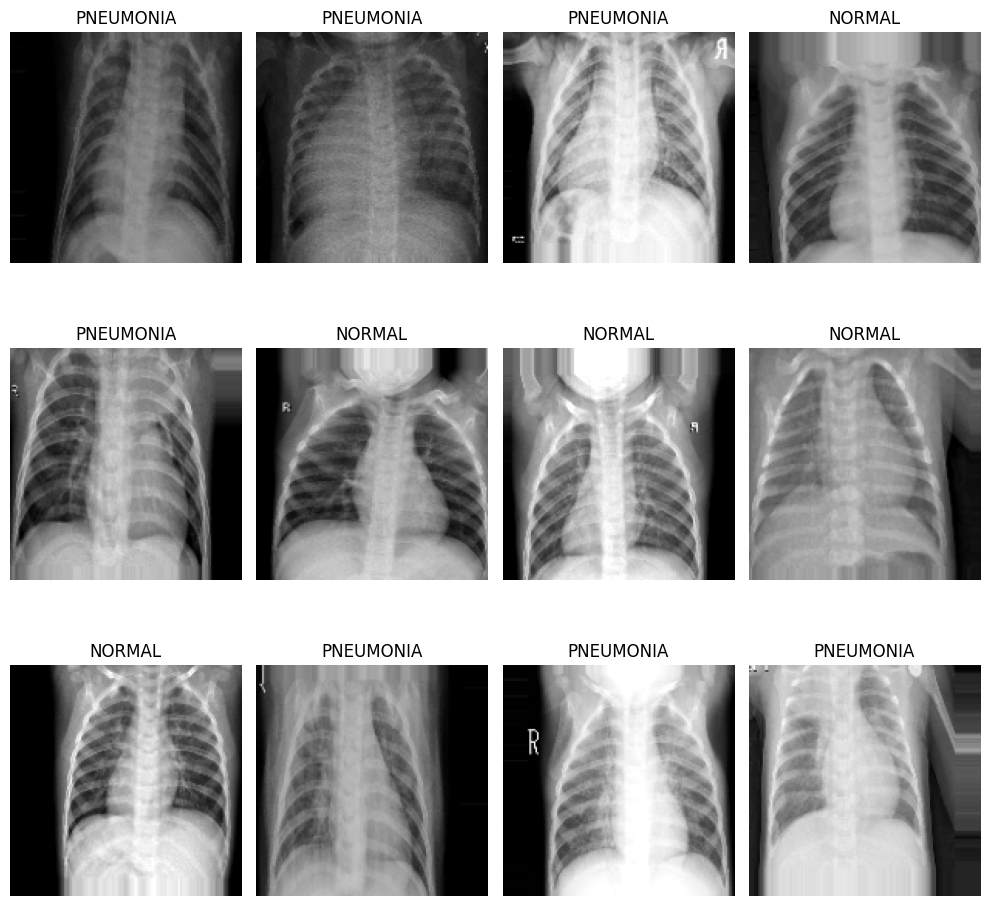

In [ ]:
%matplotlib inline

batch_size = 12

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(len(images), 12)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"{classes[int(labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
from keras.applications import MobileNetV2
mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in mobileNetV2.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobileNet=keras.models.Sequential([
    mobileNetV2,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

mobileNet.add(Dense(1,activation='sigmoid'))
mobileNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mobileNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 dense_2 (Dense)             (None, 1)                 2

In [ ]:
weight_path = "cnn_weights.best.weights.h5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=True)

early = EarlyStopping(monitor="val_accuracy",
                      mode="max",
                      patience=5)

callbacks_list = [checkpoint, early]

In [ ]:
mobileNet_history=mobileNet.fit(train_generator,epochs=5,validation_data=valid_generator,callbacks=callbacks_list)

Epoch 1/5
80/80 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.4791
Epoch 1: val_accuracy improved from -inf to 0.48896, saving model to cnn_weights.best.weights.h5
80/80 [==============================] - 658s 8s/step - loss: 0.6971 - accuracy: 0.4791 - val_loss: 0.6932 - val_accuracy: 0.4890
Epoch 2/5
80/80 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5043
Epoch 2: val_accuracy did not improve from 0.48896
80/80 [==============================] - 116s 1s/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4890
Epoch 3/5
80/80 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.6536
Epoch 3: val_accuracy improved from 0.48896 to 0.87697, saving model to cnn_weights.best.weights.h5
80/80 [==============================] - 119s 1s/step - loss: 0.6492 - accuracy: 0.6536 - val_loss: 0.5069 - val_accuracy: 0.8770
Epoch 4/5
80/80 [==============================] - ETA: 0s - loss: 0.5220 - accurac

In [ ]:
mobileNet.load_weights(weight_path)

In [ ]:
evaluation_result = mobileNet.evaluate(test_generator)

5/5 [==============================] - 62s 14s/step - loss: 0.4712 - accuracy: 0.9022


In [ ]:
print("Test Loss:", evaluation_result[0])

Test Loss: 0.4711914658546448


In [ ]:
print("Test Accuracy:", evaluation_result[1])

Test Accuracy: 0.9022082090377808


In [ ]:
y_pred = mobileNet.predict(test_generator)

5/5 [==============================] - 14s 2s/step


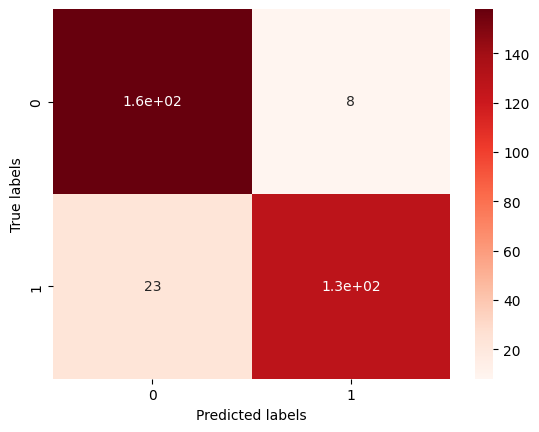

In [ ]:
y_pred_binary = np.squeeze(np.round(y_pred))

confusion_Matrix = confusion_matrix(test_generator.classes, y_pred_binary)
confusion_Matrix

sns.heatmap(confusion_Matrix, annot=True, cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

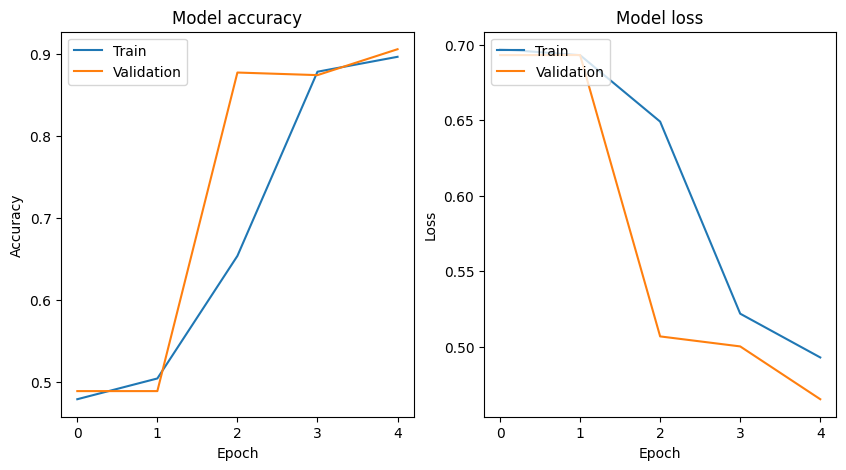

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(mobileNet_history.history['accuracy'])
ax1.plot(mobileNet_history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')


ax2.plot(mobileNet_history.history['loss'])
ax2.plot(mobileNet_history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.show()

In [ ]:
mobilenet_pred_binary = np.squeeze(np.round(y_pred))
print(classification_report(test_generator.classes, mobilenet_pred_binary))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       166
           1       0.94      0.85      0.89       151

    accuracy                           0.90       317
   macro avg       0.91      0.90      0.90       317
weighted avg       0.91      0.90      0.90       317



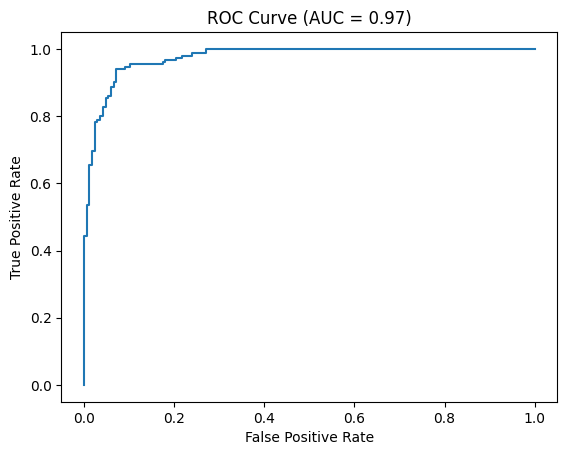

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score



fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred)


auc_score = roc_auc_score(test_generator.classes, y_pred)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score:.2f})')
plt.show()

1/1 [==============================] - 0s 39ms/step


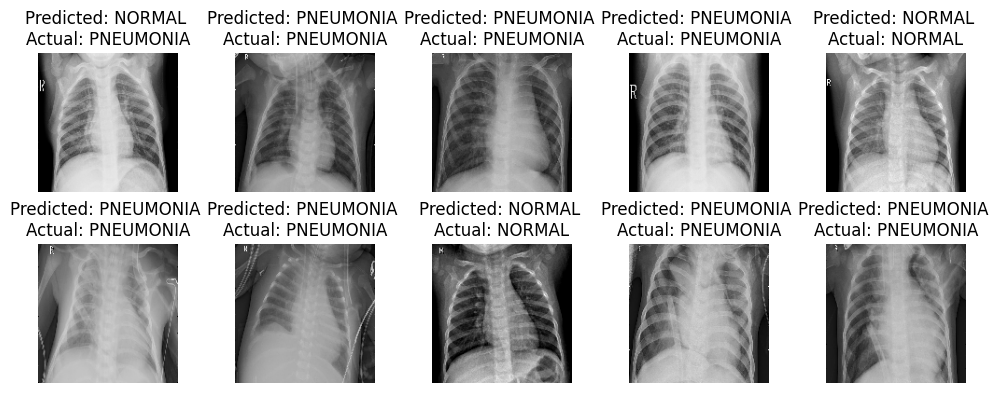

In [ ]:


# Assuming classes is a list or dictionary with class labels
classes = {0: 'NORMAL', 1: 'PNEUMONIA'}

x_test, y_test = next(test_generator)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()

for i in range(10):
    predicted = mobileNet.predict(np.array([x_test[i]])) # Changed the index to i
    predictedClass = int(predicted >= 0.5)
    actual = int(y_test[i])

    axs[i].imshow(x_test[i], cmap='gray') # Changed the index to i
    axs[i].set_title(f'Predicted: {classes[predictedClass]} \nActual: {classes[actual]}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

